In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
advertising=pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
%matplotlib inline

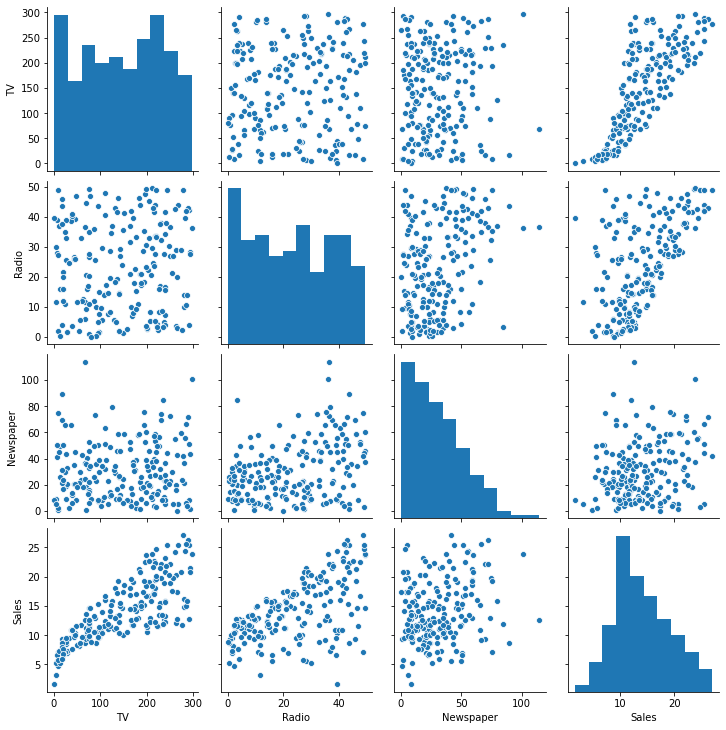

In [6]:
sns.pairplot(advertising)

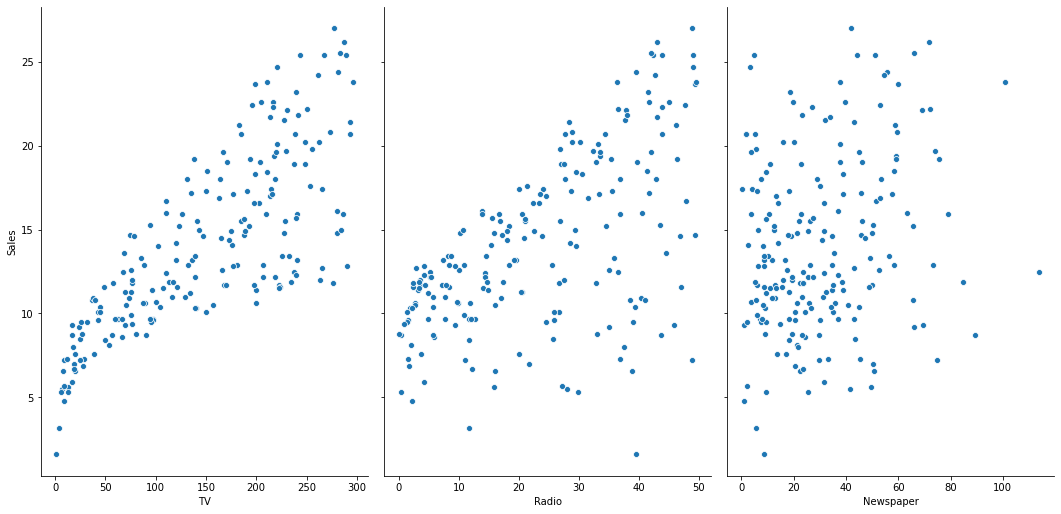

In [7]:
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='scatter')

In [8]:
x=advertising[['TV','Radio','Newspaper']]
y=advertising['Sales']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=100)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lg=LinearRegression()

In [12]:
lg.fit(x_train, y_train)

LinearRegression()

In [13]:
print(lg.intercept_)

2.6527896688794943


In [14]:
coeff_df=pd.DataFrame(lg.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [15]:
y_pred=lg.predict(x_test)
len(y_pred)

60

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

In [18]:
mse

1.8506819941636972

In [19]:
r_squared

0.9058622107532245

In [20]:
import statsmodels.api as sm

In [21]:
x_train_sm=x_train

In [22]:
x_train_sm=sm.add_constant(x_train_sm)
lm1=sm.OLS(y_train, x_train_sm).fit()

In [23]:
advertising.shape

(200, 4)

In [27]:
lm1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [28]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           9.97e-66
Time:                        11:06:21   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

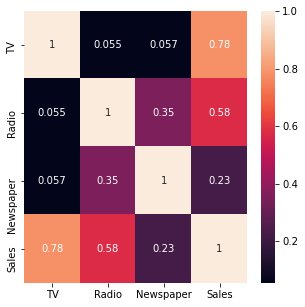

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising.corr(),annot=True)

In [31]:
x_train_new=x_train[['TV','Radio']]
x_test_new=x_test[['TV','Radio']]

In [33]:
lg.fit(x_train_new, y_train)

LinearRegression()

In [34]:
y_pred_new=lg.predict(x_test_new)

Text(0, 0.5, 'Sales')

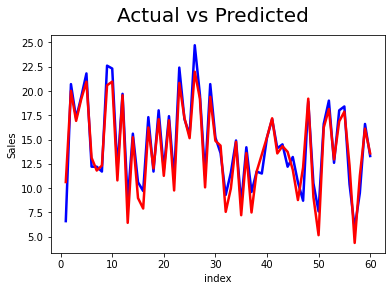

In [35]:
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('index',fontsize=10)
plt.ylabel('Sales',fontsize=10)

Text(0, 0.5, 'Sales')

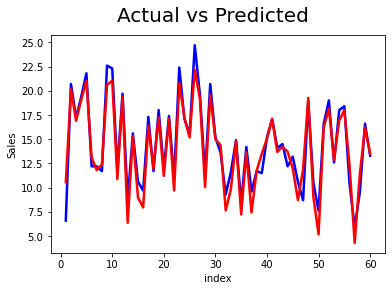

In [37]:
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred_new, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('index',fontsize=10)
plt.ylabel('Sales',fontsize=10)

Text(0, 0.5, 'sales')

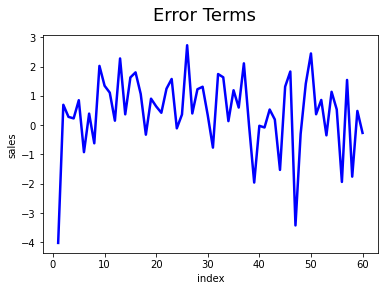

In [36]:
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c, y_test-y_pred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=18)
plt.xlabel('index',fontsize=10)
plt.ylabel('sales', fontsize=10)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, y_pred_new)
r_squared=r2_score(y_test,y_pred_new)

In [40]:
mse

1.784740052090281

In [41]:
r_squared

0.909216449171822

In [42]:
x_train_final=x_train_new
x_train_final=sm.add_constant(x_train_final)

In [45]:
lm_final=sm.OLS(y_train, x_train_final).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           4.46e-67
Time:                        12:24:28   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

In [46]:
from sklearn.feature_selection import RFE

In [49]:
rfe=RFE(lg,2)

In [50]:
rfe=rfe.fit(x_train,y_train)

In [51]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


In [78]:
advertising_m=pd.read_csv('advertising.csv')

In [79]:
advertising_m.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [80]:
x_news=advertising_m['Newspaper']
y_news=advertising_m['Sales']

In [81]:
x_train,x_test,y_train, y_test= train_test_split(x_news,y_news,train_size=0.7,random_state=110)

In [82]:
x_train=x_train[:,np.newaxis]
y_train=y_train[:,np.newaxis]
lmm=LinearRegression()

In [83]:
lmm.fit(x_train,y_train)

LinearRegression()

In [84]:
x_test=x_test[:,np.newaxis]
y_test=y_test[:,np.newaxis]

In [85]:
y_pred=lmm.predict(x_test)

In [86]:
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

In [87]:
mse

23.84732008485191

In [88]:
r_squared

0.08182413570736657